In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from matplotlib.animation import FuncAnimation

%matplotlib inline

# Read in GDP and Internet Usage data from the Guided Exploration

In [2]:
gdp_df = pd.read_csv(r"..\data\gdp_per_capita.csv", skipfooter=2,)
del gdp_df['Value Footnotes']
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

<ipython-input-2-5a2c4ba7cb96>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  gdp_df = pd.read_csv(r"..\data\gdp_per_capita.csv", skipfooter=2,)


In [3]:
internet_df = pd.read_csv(r"..\data\internet_use.csv", error_bad_lines=False, warn_bad_lines=True, nrows=4495)

In [4]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


# Read in the UN Data set for Compulsory education duration.

In [5]:
comp_edu_dur_df = pd.read_csv(r"..\data\compulsory_edu_duration.csv", error_bad_lines=False, warn_bad_lines=True)

In [6]:
comp_edu_dur_df.head()

,Reference Area,Time Period,Sex,Age group,Units of measurement,Observation Value
0,Afghanistan,2014,Not applicable,Not applicable,Number,9
1,Afghanistan,2013,Not applicable,Not applicable,Number,9
2,Afghanistan,2012,Not applicable,Not applicable,Number,9
3,Afghanistan,2011,Not applicable,Not applicable,Number,9
4,Afghanistan,2010,Not applicable,Not applicable,Number,9


In [7]:
comp_edu_dur_df.Sex.unique()

array(['Not applicable'], dtype=object)

In [8]:
comp_edu_dur_df['Age group'].unique()

array(['Not applicable'], dtype=object)

In [9]:
comp_edu_dur_df['Units of measurement'].unique()

array(['Number'], dtype=object)

In [10]:
del comp_edu_dur_df['Sex']
del comp_edu_dur_df['Age group']
del comp_edu_dur_df['Units of measurement']
comp_edu_dur_df.columns=['Country', 'Year', 'Education_Years']

the dataset does not seem include different values for sex or age group, and has one unit of measurement

In [11]:
comp_edu_dur_gdp_df = comp_edu_dur_df.merge(gdp_df, on=['Country', 'Year'])

How does GDP's impact on education change over the years

In [31]:
print(sorted(comp_edu_dur_df['Year'].unique()))

[1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [50]:
def year_edu_vs_gdp(year):
    label = 'timestep {0}'.format(year)
    p = sns.boxplot(x ="Education_Years",  
             y ="GDP_Per_Capita",  
             data = comp_edu_dur_gdp_df[comp_edu_dur_gdp_df['Year']==year])  
    p.tick_params(labelsize=17)
    plt.setp(p.boxplot)
    

In [51]:
fig = plt.figure()
fig.set_tight_layout(True)
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))
 
anim = FuncAnimation(fig, year_edu_vs_gdp, frames=sorted(comp_edu_dur_df['Year'].unique()), interval=200)
plt.show()

fig size: 72.0 DPI, size in inches [6. 4.]


<Figure size 432x288 with 0 Axes>

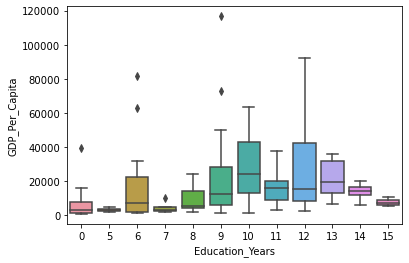

In [49]:
# comp_edu_dur_gdp_df[comp_edu_dur_gdp_df['Year']==2014].plot(kind="scatter", y="Education_Years", x='GDP_Per_Capita')
sns.boxplot(x ="Education_Years",  
             y ="GDP_Per_Capita",  
             data = comp_edu_dur_gdp_df[comp_edu_dur_gdp_df['Year']==2014])  

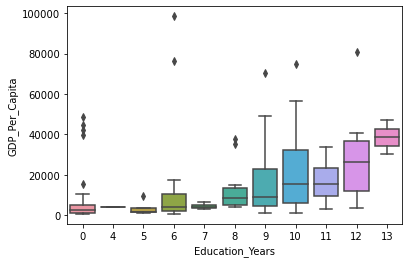

In [28]:
sns.boxplot(x ="Education_Years",  
             y ="GDP_Per_Capita",  
             data = comp_edu_dur_gdp_df[comp_edu_dur_gdp_df['Year']==1999])  

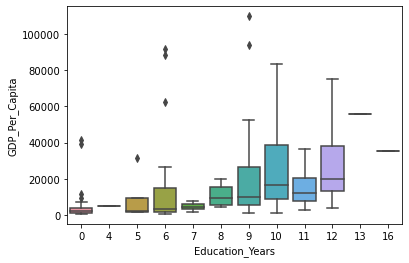

In [34]:
# comp_edu_dur_gdp_df[comp_edu_dur_gdp_df['Year']==2014].plot(kind="scatter", y="Education_Years", x='GDP_Per_Capita')
sns.boxplot(x ="Education_Years",  
             y ="GDP_Per_Capita",  
             data = comp_edu_dur_gdp_df[comp_edu_dur_gdp_df['Year']==2005])  

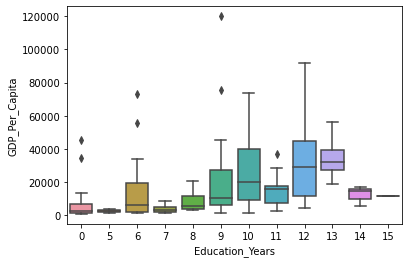

In [35]:
# comp_edu_dur_gdp_df[comp_edu_dur_gdp_df['Year']==2014].plot(kind="scatter", y="Education_Years", x='GDP_Per_Capita')
sns.boxplot(x ="Education_Years",  
             y ="GDP_Per_Capita",  
             data = comp_edu_dur_gdp_df[comp_edu_dur_gdp_df['Year']==2010])